In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
!nvidia-smi

Tue Jan 18 15:29:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.23       Driver Version: 511.23       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   38C    P8     6W / 250W |    493MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install tensorflow-gpu

  Using cached tensorflow_gpu-2.7.0-cp38-cp38-win_amd64.whl (430.8 MB)

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



**bold text**

In [56]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import io

In [57]:
IMAGE_SIZE = [128, 128]
train_path = 'G:/Dr.ChashiLite/Bean/train'
valid_path = 'G:/Dr.ChashiLite/Bean/validation',

In [58]:
mobilenet_v2 = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9420800/9406464 [==============================] - 1s 0us/step


In [59]:
# don't train existing weights
for layer in mobilenet_v2.layers:
    layer.trainable = False

In [60]:
  # useful for getting number of output classes
folders = glob('G:/Dr.ChashiLite/Bean/train/*')

In [61]:
# our layers - you can add more if you want
x = Flatten()(mobilenet_v2.output)

In [62]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=mobilenet_v2.input, outputs=prediction)

In [63]:
# view the structure of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

In [64]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [65]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [66]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'G:/Dr.ChashiLite/Bean/train/',
                                                 target_size = (128, 128),
                                                 batch_size = 28,
                                                 class_mode = 'categorical')

Found 160 images belonging to 2 classes.


In [67]:
validation_set = test_datagen.flow_from_directory(r'G:/Dr.ChashiLite/Bean/validation/',
                                            target_size = (128, 128),
                                            batch_size = 28,
                                            class_mode = 'categorical')

Found 40 images belonging to 2 classes.


In [68]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/10
6/6 [==============================] - 25s 4s/step - loss: 1.9505 - accuracy: 0.7063 - val_loss: 0.5071 - val_accuracy: 0.8000
Epoch 2/10
6/6 [==============================] - 19s 3s/step - loss: 0.2237 - accuracy: 0.9312 - val_loss: 3.1169e-05 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 19s 3s/step - loss: 5.3238e-06 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 20s 3s/step - loss: 6.8806e-05 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9750
Epoch 5/10
6/6 [==============================] - 20s 3s/step - loss: 0.0119 - accuracy: 0.9937 - val_loss: 0.0714 - val_accuracy: 0.9750
Epoch 6/10
6/6 [==============================] - 20s 4s/step - loss: 0.0154 - accuracy: 0.9937 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 19s 3s/step - loss: 2.1062e-06 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 8/10
6/6 [==

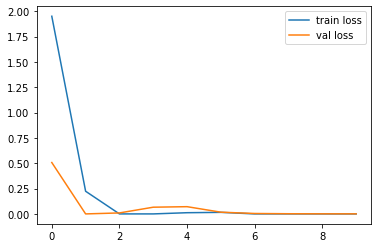

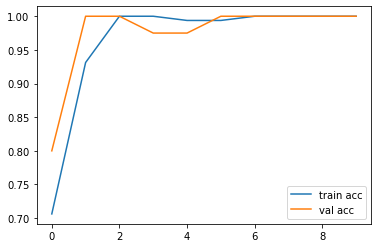

<Figure size 432x288 with 0 Axes>

In [69]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [72]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('G:/Dr.ChashiLite/Bean/bean_model_mobilenetv2.h5')

In [73]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [75]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model
model = load_model("G:/Dr.ChashiLite/Bean/bean_model_mobilenetv2.h5")
class_names = ['leaf_spot', 'mosaic_virus']


def example(image):
    image = image.reshape((-1, 128, 128, 3))
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    prediction = model.predict(image).flatten()
    return {class_names[i]: float(prediction[i]) for i in range(2)}


# initializing the input component
image = gr.inputs.Image(shape = (128, 128))
# initializing the output component
label = gr.outputs.Label(num_top_classes = 2)
# launching the interface
gr.Interface(fn = example,inputs = image,outputs = label,capture_session = True, title="Bean_Diseases_Detection",description= "Description of the user interface").launch(share=True)


C:\ProgramData\Anaconda3\lib\site-packages\gradio\interface.py:187: UserWarning: The `capture_session` parameter in the `Interface` is deprecated and has no effect.
  warnings.warn("The `capture_session` parameter in the `Interface` is deprecated and has no effect.")


Running on local URL:  http://127.0.0.1:7862/
Running on public URL: https://24814.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://24814.gradio.app')